<a href="https://colab.research.google.com/github/Dayn9/LearnTensorFlow/blob/master/Convolutional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U tensorflow_datasets

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)
tf.enable_eager_execution()  

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

     |████████████████████████████████| 686kB 9.4MB/s 

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/1.0.0. Subsequent calls will reuse this data.


In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

In [0]:
model = tf.keras.Sequential([
    #LAYER ONE takes in a single input image and outputs 32 covoluted images
    tf.keras.layers.Conv2D(32, # number convoluted outputs
                          (3,3), # kernal size
                          padding = 'same', # keep the origional image size
                          activation = tf.nn.relu),
    #LAYER TWO takes the 32 input images and outputs max pooled images at half the res
    tf.keras.layers.MaxPooling2D((2,2), # size
                       strides = 2), # offfset
    #LAYER THREE takes the 32 images and outputs 64 convoluted images
    tf.keras.layers.Conv2D(64,
                          (3,3),
                          padding = 'same', 
                          activation = tf.nn.relu),
    #LAYER FOUR takes the 64 input images and out puts max pooled images at half the res
    tf.keras.layers.MaxPooling2D((2,2),
                              strides = 2),
    #LAYER FIVE takes the 64 images and flattens them out to a series of inputs 
    tf.keras.layers.Flatten(),
    #LAYER SIX takes the series of inputs and 
    tf.keras.layers.Dense(128, # num outpurts
                         activation = tf.nn.relu),
    #LAYER SEVEN
    tf.keras.layers.Dense(10, # 10 classes 
                         activation = tf.nn.softmax)
    
])

In [0]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [8]:
model.fit(train_dataset, 
          epochs=10, 
          steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step


In [12]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))

313/313 [==============================] - 2s 7ms/step - loss: 0.3283 - acc: 0.9165


In [14]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)
  
print(predictions.shape)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])


(32, 10)
[1.2113511e-06 2.8161194e-11 3.1046988e-04 6.2865617e-08 5.7457018e-01
 2.5855368e-08 4.2511728e-01 9.7618283e-08 2.0013338e-09 6.5820836e-07]
4
6


In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

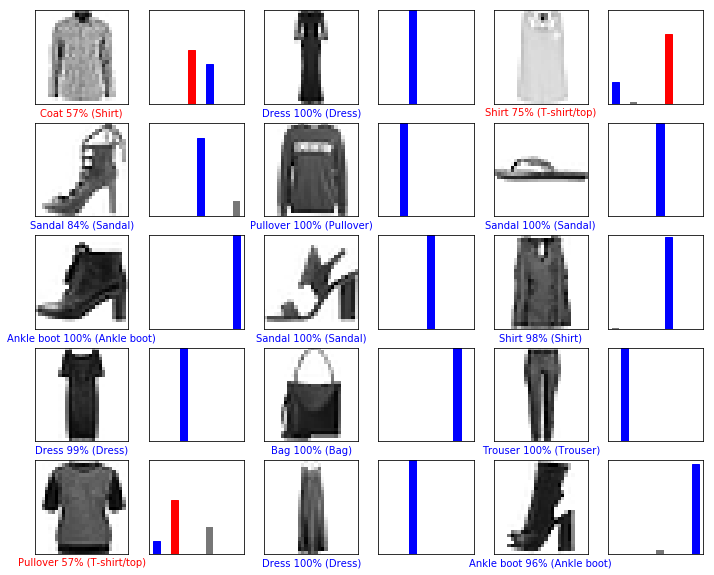

In [18]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
